In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


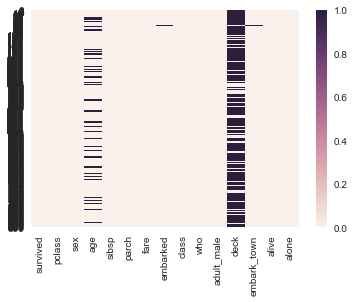

In [5]:
sns.heatmap(df.isnull())

In [6]:
# deck is the biggest culprit when it comes to missing values, let's remove it
df.drop(['deck'], axis=1, inplace=True)
df.dropna(inplace=True)

In [7]:
df.shape

(712, 14)

In [8]:
df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [9]:
df['pclass'].value_counts()

3    355
1    184
2    173
Name: pclass, dtype: int64

In [10]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
df['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

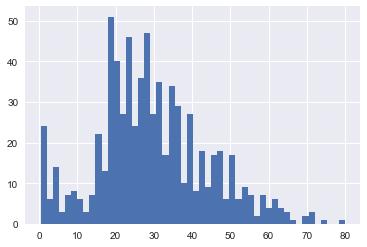

In [12]:
df['age'].hist(bins=50)

In [13]:
X = df[['pclass', 'sex', 'age']]

In [14]:
from sklearn import preprocessing

In [15]:
lb = preprocessing.LabelBinarizer()

In [16]:
X['sex'] = lb.fit_transform(X['sex'])

C:\Users\johna\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [18]:
X.describe()

,pclass,sex,age
count,712.000000,712.000000,712.000000
mean,2.240169,0.636236,29.642093
std,0.836854,0.481420,14.492933
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.000000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 3 columns):
pclass    712 non-null int64
sex       712 non-null int32
age       712 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 19.5 KB


In [20]:
y = df['survived']

In [21]:
# quite an uneven class
y.value_counts()

0    424
1    288
Name: survived, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''Print scoring metrics for classifier on training data'''
    if train:
        print("Train Result:\n")
        print("Accuracy score: {0:.4f}".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report:\n {}".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix:\n {} \n".format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t {0:.4f}".format(np.std(res)))
        
      
    elif train == False:
        '''Print scoring metrics for classifier on test data'''  
        
        print("Test Result:\n")
        print("Accuracy score: {0:.4f}".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report:\n {}".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix:\n {} \n".format(confusion_matrix(y_test, clf.predict(X_test))))

## AdaBoost

Similar to human learning, adaboost learns from past mistakes and focuses more on difficult problems.

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [27]:
ada_clf = AdaBoostClassifier(random_state=42)

In [29]:
ada_clf.fit(X_train, y_train)
# SAMME.16 => Stagewise Additive Modeling using Multiclass Exponential loss function
# R => real
# base estimator is decision tree as default

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)

In [30]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.8184
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.82      0.85       325
          1       0.75      0.81      0.78       209

avg / total       0.82      0.82      0.82       534

Confusion Matrix:
 [[267  58]
 [ 39 170]] 

Average accuracy: 	 0.7907
Accuracy SD: 	 0.0707


In [31]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7978
Classification Report:
              precision    recall  f1-score   support

          0       0.81      0.83      0.82        99
          1       0.78      0.76      0.77        79

avg / total       0.80      0.80      0.80       178

Confusion Matrix:
 [[82 17]
 [19 60]] 



## AdaBoost with Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
ada_clf = AdaBoostClassifier(random_state=42, base_estimator=RandomForestClassifier())

In [35]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=42)

In [36]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9064
Classification Report:
              precision    recall  f1-score   support

          0       0.90      0.95      0.92       325
          1       0.91      0.84      0.88       209

avg / total       0.91      0.91      0.91       534

Confusion Matrix:
 [[308  17]
 [ 33 176]] 

Average accuracy: 	 0.8036
Accuracy SD: 	 0.0474


In [37]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7809
Classification Report:
              precision    recall  f1-score   support

          0       0.78      0.85      0.81        99
          1       0.79      0.70      0.74        79

avg / total       0.78      0.78      0.78       178

Confusion Matrix:
 [[84 15]
 [24 55]] 



## Gradient Boosting Machine
* Sequentially adds predictors
* each one correcting its predecessor
* Fits new predictor to the residual errors

Involves 3 elements
* loss function to be optimized
* weak learner to make predictions
* additive model to add weak learners to minimize the loss function

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gbc_clf = GradientBoostingClassifier(n_estimators=100)

In [49]:
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [50]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9045
Classification Report:
              precision    recall  f1-score   support

          0       0.90      0.95      0.92       325
          1       0.91      0.84      0.87       209

avg / total       0.90      0.90      0.90       534

Confusion Matrix:
 [[308  17]
 [ 34 175]] 

Average accuracy: 	 0.8034
Accuracy SD: 	 0.0301


In [51]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7584
Classification Report:
              precision    recall  f1-score   support

          0       0.75      0.85      0.80        99
          1       0.77      0.65      0.70        79

avg / total       0.76      0.76      0.76       178

Confusion Matrix:
 [[84 15]
 [28 51]] 



## XGBoost (Extreme Gradient Boosting)

Objective Function: Training Loss + Regularization
* L is the training loss function
    * measure of how predictive the model is on training data
    * ex. regression -> mean squared error
    * ex. logistic loss -> logit
* omega is the regularization term
    * regularization controls overfitting

* constantly working to minimize the loss function via regularization

In [54]:
import xgboost as xgb

In [59]:
xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimators=1000, learning_rate=0.2)

In [60]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [61]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9007
Classification Report:
              precision    recall  f1-score   support

          0       0.89      0.96      0.92       325
          1       0.93      0.81      0.86       209

avg / total       0.90      0.90      0.90       534

Confusion Matrix:
 [[312  13]
 [ 40 169]] 

Average accuracy: 	 0.8109
Accuracy SD: 	 0.0519


In [62]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7753
Classification Report:
              precision    recall  f1-score   support

          0       0.77      0.86      0.81        99
          1       0.79      0.67      0.73        79

avg / total       0.78      0.78      0.77       178

Confusion Matrix:
 [[85 14]
 [26 53]] 

